<a href="https://colab.research.google.com/github/finesaaa/clustering-assignment/blob/main/dataset_deep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hey there!** 

Thanks for stopping by and taking a look at this notebook. I would be really grateful if you could spend some time on the notebook and give me some areas of improvement. Looking forward to learning from you. 

**Cheers,
Komal**

In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score

In [35]:
df=pd.read_csv('travel insurance.csv')
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [36]:
df.shape

(63326, 11)

*Dataset has 11 columns and 63326 rows. Out of the 11 columns, Claim is a target variable.*

In [37]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

All the column names are listed above. Since there is whitespace between the 2 word column names, let's rename the column names to avoid any naming issues.

In [38]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)

The necessary columns have been successfully renamed.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency_Type           63326 non-null  object 
 2   Distribution_Channel  63326 non-null  object 
 3   Product_Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net_Sales             63326 non-null  float64
 8   Commision             63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


From the info, we know that there are 4 numerical columns while 7 are categorical.

In [40]:
df.isnull().sum().any


<bound method Series.any of Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Claim                       0
Duration                    0
Destination                 0
Net_Sales                   0
Commision                   0
Gender                  45107
Age                         0
dtype: int64>

In [41]:
df=df.drop(['Gender'], axis=1)
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


The Gender column has been dropped since majority of its values are null.

In [42]:
column_keys=df.select_dtypes(include=['object']).columns.tolist()
for key in column_keys:
    print('Unique elements of',key,'are: ')
    print(df[key].unique(),end='\n')
    print(end='\n')

Unique elements of Agency are: 
['CBH' 'CWT' 'JZI' 'KML' 'EPX' 'C2B' 'JWT' 'RAB' 'SSI' 'ART' 'CSR' 'CCR'
 'ADM' 'LWC' 'TTW' 'TST']

Unique elements of Agency_Type are: 
['Travel Agency' 'Airlines']

Unique elements of Distribution_Channel are: 
['Offline' 'Online']

Unique elements of Product_Name are: 
['Comprehensive Plan' 'Rental Vehicle Excess Insurance' 'Value Plan'
 'Basic Plan' 'Premier Plan' '2 way Comprehensive Plan' 'Bronze Plan'
 'Silver Plan' 'Annual Silver Plan' 'Cancellation Plan'
 '1 way Comprehensive Plan' 'Ticket Protector' '24 Protect' 'Gold Plan'
 'Annual Gold Plan' 'Single Trip Travel Protect Silver'
 'Individual Comprehensive Plan' 'Spouse or Parents Comprehensive Plan'
 'Annual Travel Protect Silver' 'Single Trip Travel Protect Platinum'
 'Annual Travel Protect Gold' 'Single Trip Travel Protect Gold'
 'Annual Travel Protect Platinum' 'Child Comprehensive Plan'
 'Travel Cruise Protect' 'Travel Cruise Protect Family']

Unique elements of Claim are: 
['No' 'Yes']

Un

In [43]:
df1 = df.groupby(by=["Destination"]).size().reset_index(name="counts")
df1.nlargest(15,['counts'])
df1['DestinationNew'] = np.where(df1['counts']>1090, df1['Destination'], 'Others')
fig = px.pie(df1, values='counts', names='DestinationNew', title='Popular Destinations among insured')
fig.show()

A pie chart depicting 15 most popular destinations among travel insured.Here, I have grouped countries which have less than 1090 insurance policies together into others.

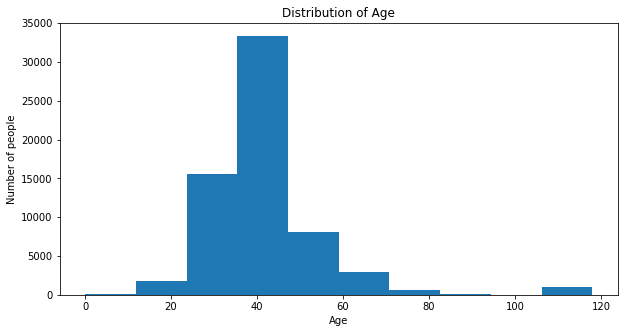

In [44]:
fig = plt.figure(figsize = (10, 5))
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Number of people")
plt.title("Distribution of Age")
plt.show()

The above figure shows a histogram depicting the distribution of age. From the graph, the majory of people opting for travel insurance are of the age 35 to 50.

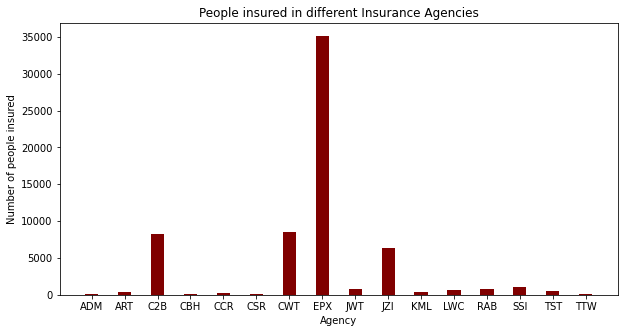

In [45]:
df2 = df.groupby(by=["Agency"]).size().reset_index(name="counts")
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Agency'], df2['counts'], color ='maroon', width = 0.4)
plt.xlabel("Agency")
plt.ylabel("Number of people insured")
plt.title("People insured in different Insurance Agencies")
plt.show()

The majority of people are insured under EPX agency.

In [46]:
df3 = df.groupby(by=["Product_Name"]).size().reset_index(name="counts")
fig = px.pie(df3, values='counts', names='Product_Name', title='People insured under different plans')
fig.show()

The pie chart depicts that majority of travel insured people have opted for Cancellation Plan.

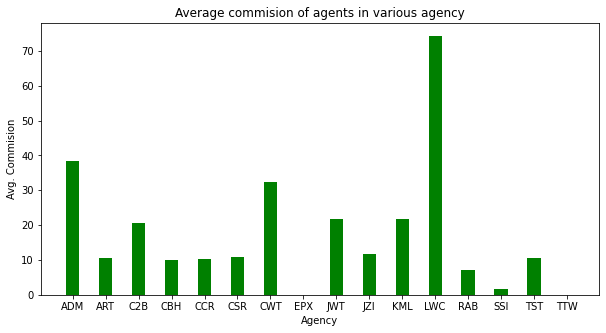

In [47]:
df4=df.groupby(by=['Agency']).mean().reset_index()
df4.head()
fig = plt.figure(figsize = (10, 5))
plt.bar(df4['Agency'], df4['Commision'], color ='green', width = 0.4)
plt.xlabel("Agency")
plt.ylabel("Avg. Commision")
plt.title("Average commision of agents in various agency")
plt.show()

LWC is the agency that gives maximum commision to its agents while EPX gives NIL.

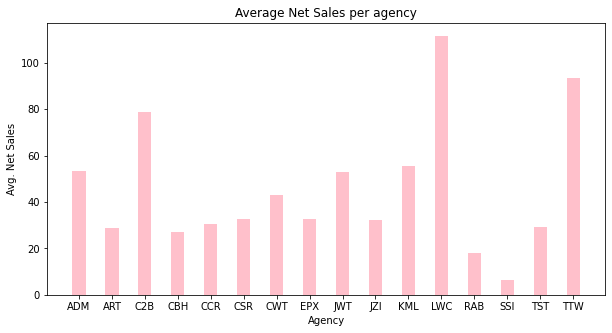

In [48]:
fig = plt.figure(figsize = (10, 5))
plt.bar(df4['Agency'], df4['Net_Sales'], color ='pink', width = 0.4)
plt.xlabel("Agency")
plt.ylabel("Avg. Net Sales")
plt.title("Average Net Sales per agency")
plt.show()

The net sales are highest for LWC while lowest for SSI.

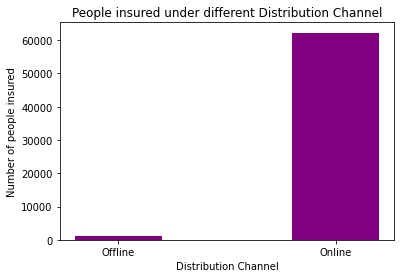

In [49]:
df5=df.groupby(by=['Distribution_Channel']).size().reset_index(name="counts")
plt.bar(df5['Distribution_Channel'], df5['counts'], color ='purple',width = 0.4)
plt.xlabel("Distribution Channel")
plt.ylabel("Number of people insured")
plt.title("People insured under different Distribution Channel")
plt.show()

Majority of people have opted for online mode of insurance distribution channel.

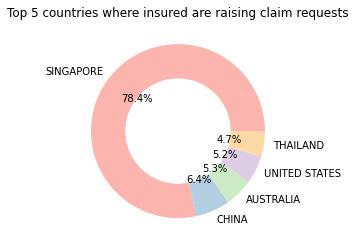

In [50]:
df6=df.loc[df['Claim']=='Yes']
df7= df6.groupby(by=["Destination"]).size().reset_index(name="counts")
df8=df7.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df8['counts'], labels=df8['Destination'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('Top 5 countries where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Singapore tops the list with maximum number of claim request filed. 

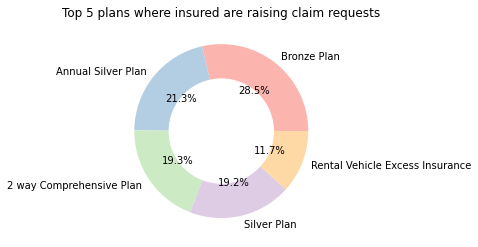

In [51]:
df9= df6.groupby(by=["Product_Name"]).size().reset_index(name="counts")
df10=df9.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df10['counts'], labels=df10['Product_Name'], autopct='%1.1f%%',colors=Pastel1_7.hex_colors)
plt.title('Top 5 plans where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The majority claim requests are coming from Bronze Plan and Annual Silver Plan.

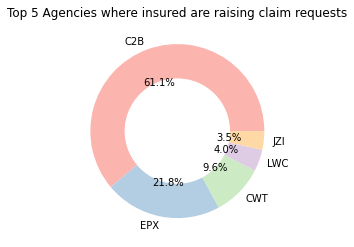

In [52]:
df11= df6.groupby(by=["Agency"]).size().reset_index(name="counts")
df12=df11.nlargest(5,['counts'])
my_circle = plt.Circle((0, 0), 0.6, color='white')
plt.pie(df12['counts'], labels=df12['Agency'], autopct='%1.1f%%', colors=Pastel1_7.hex_colors)
plt.title('Top 5 Agencies where insured are raising claim requests')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The maximum claim requests have come to the agency called C2B.

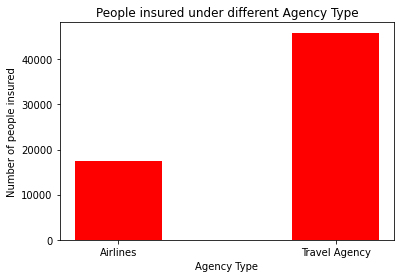

In [53]:
df13=df.groupby(by=['Agency_Type']).size().reset_index(name="counts")
plt.bar(df13['Agency_Type'], df13['counts'], color ='red',width = 0.4)
plt.xlabel("Agency Type")
plt.ylabel("Number of people insured")
plt.title("People insured under different Agency Type")
plt.show()

Majority of people have got their insurance via Travel Agency.

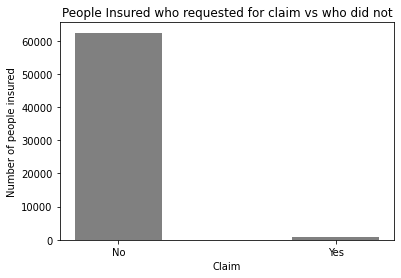

In [54]:
df14 = df.groupby(by=["Claim"]).size().reset_index(name="counts")
plt.bar(df14['Claim'], df14['counts'], color ='grey',width = 0.4)
plt.xlabel("Claim")
plt.ylabel("Number of people insured")
plt.title("People Insured who requested for claim vs who did not")
plt.show()

Around 900 people have requested for claim out of total policy holders which is around 1.4%.

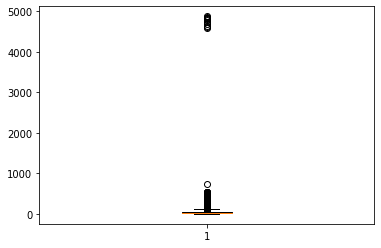

In [55]:
fig = plt.figure(figsize =(6,4 ))
plt.boxplot(df['Duration'])
plt.show()

The boxplot shows data distribution of the Duration feature. We can see that there are some outliers depicting negative values of duration i.e. Time which ideally is not possible.

In [56]:
index_duration = df[df['Duration'] < 0 ].index
df.drop(index_duration, inplace = True)

Dropped off negative values of Duration column.

In [57]:
from sklearn import preprocessing
label_encoder1 = preprocessing.LabelEncoder()
df['Agency']= label_encoder1.fit_transform(df['Agency'])
  
label_encoder2 = preprocessing.LabelEncoder()
df['Agency_Type']= label_encoder2.fit_transform(df['Agency_Type'])

label_encoder3 = preprocessing.LabelEncoder()
df['Distribution_Channel']= label_encoder3.fit_transform(df['Distribution_Channel'])

label_encoder4 = preprocessing.LabelEncoder()
df['Product_Name']= label_encoder4.fit_transform(df['Product_Name'])

label_encoder5 = preprocessing.LabelEncoder()
df['Claim']= label_encoder5.fit_transform(df['Claim'])


label_encoder6 = preprocessing.LabelEncoder()
df['Destination']= label_encoder6.fit_transform(df['Destination'])


Label encoding is used to transform categorical features.

In [58]:
df

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,3,1,0,12,0,186,79,-29.0,9.57,81
1,3,1,0,12,0,186,79,-29.0,9.57,71
2,6,1,1,16,0,65,4,-49.5,29.70,32
3,6,1,1,16,0,60,4,-39.6,23.76,32
4,6,1,1,16,0,79,61,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,9,0,1,8,0,111,63,35.0,12.25,31
63322,9,0,1,8,0,58,26,40.0,14.00,40
63323,9,0,1,8,0,2,79,18.0,6.30,57
63324,9,0,1,8,0,3,145,18.0,6.30,63


In [59]:
column_names = ["Agency", "Agency_Type", "Distribution_Channel","Product_Name","Duration","Destination","Net_Sales","Commision","Age","Claim"]
df = df.reindex(columns=column_names)

Reordered the columns of the dataset to keep the target column i.e. Claim at the end.

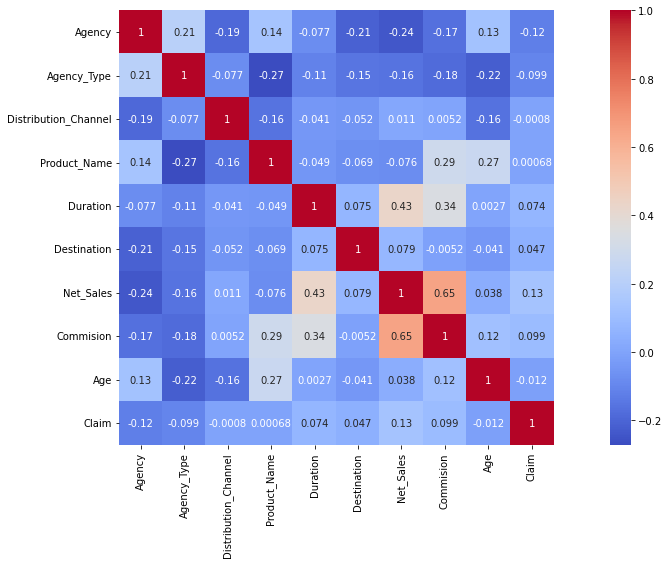

In [60]:
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

Plotted the corelation coefficient to check the degree of colinearity which each individidual feature have with the output label. Clearly there is no high colinearity among any of the features. 

In [61]:
y=df.iloc[:,[-1]]
X=df.drop(y.columns,axis = 1)

Sepearting features and target variable into X and y respectively.

In [62]:
X

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision,Age
0,3,1,0,12,186,79,-29.0,9.57,81
1,3,1,0,12,186,79,-29.0,9.57,71
2,6,1,1,16,65,4,-49.5,29.70,32
3,6,1,1,16,60,4,-39.6,23.76,32
4,6,1,1,16,79,61,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...
63321,9,0,1,8,111,63,35.0,12.25,31
63322,9,0,1,8,58,26,40.0,14.00,40
63323,9,0,1,8,2,79,18.0,6.30,57
63324,9,0,1,8,3,145,18.0,6.30,63


In [63]:
y

,Claim
0,0
1,0
2,0
3,0
4,0
...,...
63321,0
63322,0
63323,0
63324,0
